In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
asyest = pd.read_csv('csvs/AsyEst.csv')
asyest

,Assemblage,Diversity,Observed,Estimator,s.e.,LCL,UCL
0,bvt,Species richness,7.000000,7.496154,1.315290,7.000000,10.074074
1,bvt,Shannon diversity,4.348913,4.467602,0.318121,3.844096,5.091108
2,bvt,Simpson diversity,3.342563,3.404385,0.348148,2.722027,4.086743
3,camera,Species richness,5.000000,5.995984,0.356186,5.297872,6.694096
4,camera,Shannon diversity,2.277851,2.304379,0.097979,2.112344,2.496414
5,camera,Simpson diversity,1.916510,1.923618,0.087643,1.751841,2.095396
6,net,Species richness,5.000000,5.000000,0.682923,5.000000,6.338504
7,net,Shannon diversity,2.783532,2.817130,0.159478,2.504560,3.129701
8,net,Simpson diversity,2.415094,2.434783,0.138796,2.162748,2.706817


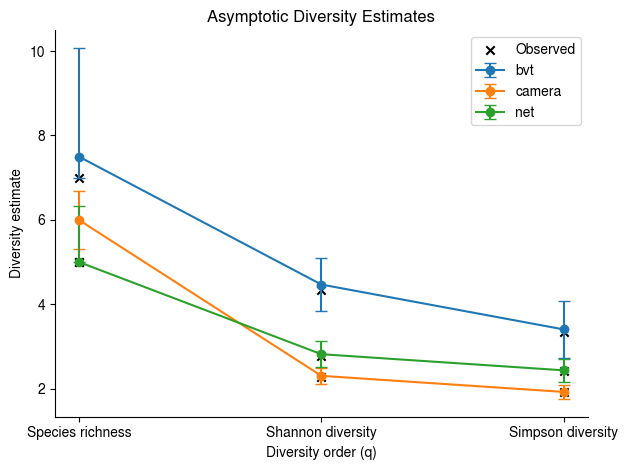

In [11]:
fig, ax = plt.subplots()

# Loop over assemblages to separate curves
for assemblage, subdf in asyest.groupby("Assemblage"):
    ax.errorbar(
        subdf["Diversity"],        # x-axis
        subdf["Estimator"],        # y-axis
        yerr=[subdf["Estimator"] - subdf["LCL"], subdf["UCL"] - subdf["Estimator"]],
        fmt="o-", capsize=4, label=assemblage
    )

# Optional: add observed values
ax.scatter(asyest["Diversity"], asyest["Observed"], color="black", marker="x", label="Observed")

ax.set_xlabel("Diversity order (q)")
ax.set_ylabel("Diversity estimate")
ax.set_title("Asymptotic Diversity Estimates")
ax.legend()
plt.tight_layout()

In [4]:
pd.read_csv('csvs/DataInfo.csv')

,Assemblage,n,S.obs,SC,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,camera,249,5,0.9920,2,0,0,0,0,0,0,0,0,0
1,bvt,130,7,0.9924,1,1,0,0,0,0,0,0,0,0
2,net,176,5,1.0000,1,0,1,0,0,0,0,0,0,0


In [16]:
size_est = pd.read_csv('csvs/iNextEst_size_based.csv')
size_est

,Assemblage,m,Method,Order.q,qD,qD.LCL,qD.UCL,SC,SC.LCL,SC.UCL
0,camera,1,Rarefaction,0,1.000000,1.000000,1.000000,0.519854,0.468704,0.571003
1,camera,14,Rarefaction,0,2.640217,2.398068,2.882366,0.963513,0.952967,0.974058
2,camera,28,Rarefaction,0,3.021297,2.699839,3.342754,0.979974,0.971971,0.987976
3,camera,42,Rarefaction,0,3.252556,2.876641,3.628472,0.986643,0.979668,0.993617
4,camera,55,Rarefaction,0,3.406227,2.980595,3.831858,0.989586,0.983832,0.995341
...,...,...,...,...,...,...,...,...,...,...
355,net,315,Extrapolation,2,2.423743,2.176585,2.670901,1.000000,0.998697,1.000000
356,net,324,Extrapolation,2,2.424048,2.176806,2.671290,1.000000,0.998824,1.000000
357,net,333,Extrapolation,2,2.424337,2.177016,2.671658,1.000000,0.998938,1.000000
358,net,342,Extrapolation,2,2.424611,2.177215,2.672007,1.000000,0.999041,1.000000


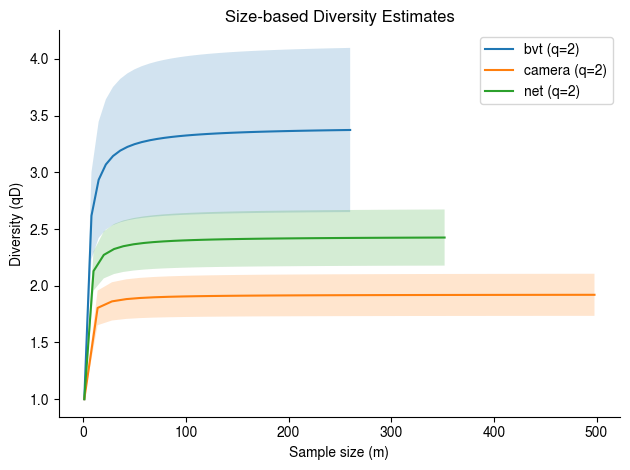

In [22]:
fig, ax = plt.subplots()

q = 2

df_q = size_est[size_est["Order.q"] == q]

for (assemblage, q), subdf in df_q.groupby(["Assemblage", "Order.q"]):
    ax.plot(
        subdf["m"], subdf["qD"], label=f"{assemblage} (q={q})"
    )
    ax.fill_between(
        subdf["m"], subdf["qD.LCL"], subdf["qD.UCL"], alpha=0.2
    )

ax.set_xlabel("Sample size (m)")
ax.set_ylabel("Diversity (qD)")
ax.set_title("Size-based Diversity Estimates")
ax.legend()
plt.tight_layout()

In [32]:
cov_est = pd.read_csv('csvs/iNextEst_coverage_based.csv')
cov_est

,Assemblage,SC,m,Method,Order.q,qD,qD.LCL,qD.UCL
0,camera,0.519859,1,Rarefaction,0,1.000014,0.936025,1.064002
1,camera,0.963513,14,Rarefaction,0,2.640218,2.266948,3.013488
2,camera,0.979974,28,Rarefaction,0,3.021297,2.565019,3.477575
3,camera,0.986643,42,Rarefaction,0,3.252556,2.760568,3.744545
4,camera,0.989586,55,Rarefaction,0,3.406227,2.881980,3.930474
...,...,...,...,...,...,...,...,...
295,net,0.993864,146,Rarefaction,2,2.411088,2.167356,2.654820
296,net,0.994105,155,Rarefaction,2,2.412451,2.168690,2.656213
297,net,0.994268,165,Rarefaction,2,2.413793,2.170039,2.657547
298,net,0.994318,174,Rarefaction,2,2.414923,2.171518,2.658327


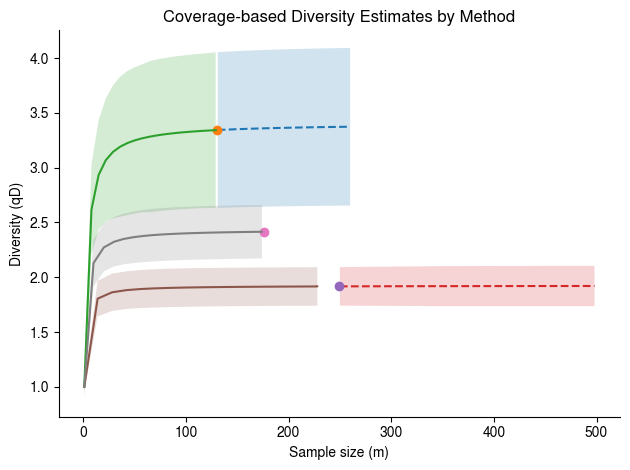

In [42]:
fig, ax = plt.subplots()

method_styles = {
    "Rarefaction": {"linestyle": "-", "marker": ""},
    "Observed": {"linestyle": "None", "marker": "o"},
    "Extrapolation": {"linestyle": "--", "marker": ""}
}

q = 2

df_q = cov_est[cov_est["Order.q"] == q]

for (assemblage, q), subdf in df_q.groupby(["Assemblage", "Order.q"]):
    for method, mdf in subdf.groupby("Method"):
        style = method_styles.get(method, {"linestyle": "-", "marker": ""})
        ax.plot(
            mdf["m"], mdf["qD"],
            label=f"{assemblage}, q={q}, {method}",
            **style
        )
        ax.fill_between(
            mdf["m"], mdf["qD.LCL"], mdf["qD.UCL"],
            alpha=0.2
        )

ax.set_xlabel("Sample size (m)")
ax.set_ylabel("Diversity (qD)")
ax.set_title("Coverage-based Diversity Estimates by Method")
# ax.legend()
plt.tight_layout()

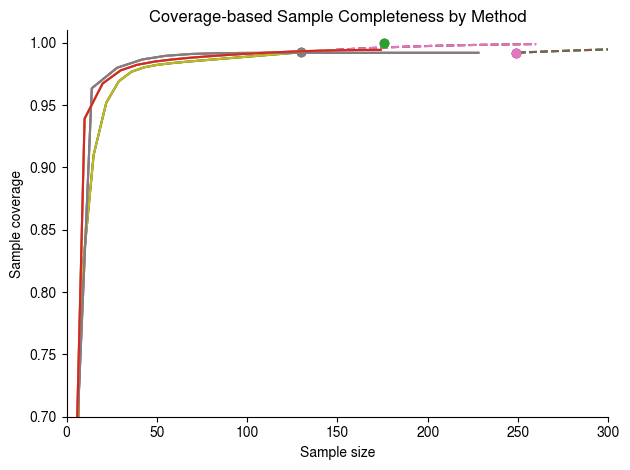

In [41]:
fig, ax = plt.subplots()

method_styles = {
    "Rarefaction": {"linestyle": "-", "marker": ""},
    "Observed": {"linestyle": "None", "marker": "o"},
    "Extrapolation": {"linestyle": "--", "marker": ""}
}

for (assemblage, q), subdf in cov_est.groupby(["Assemblage", "Order.q"]):
    for method, mdf in subdf.groupby("Method"):
        style = method_styles.get(method, {"linestyle": "-", "marker": ""})
        ax.plot(
            mdf["m"], mdf["SC"],
            label=f"{assemblage}, q={q}, {method}",
            **style
        )
        if "SC.LCL" in mdf and "SC.UCL" in mdf:
            ax.fill_between(
                mdf["m"], mdf["SC.LCL"], mdf["SC.UCL"],
                alpha=0.2
            )

ax.set_xlabel("Sample size")
ax.set_ylabel("Sample coverage")
ax.set_title("Coverage-based Sample Completeness by Method")
ax.set_ylim(0.7, 1.01)
ax.set_xlim(0, 300)
# ax.legend()
plt.tight_layout()